In [1]:
import os
import pandas as pd
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

## Input data fetching

We use the results from our previous examples (1 and 2), but you can use your own prepared GeoDataFrames

In [2]:
# load aggregated info we have
blocks = gpd.read_parquet(os.path.join(example_data_path, "blocks.parquet"))
adjacency_matrix = pd.read_pickle(os.path.join(example_data_path, "adjacency_matrix.pickle"))

In [3]:
from blocksnet.models import City

city_model = City(
  blocks_gdf=blocks, 
  adjacency_matrix=adjacency_matrix, 
)

In [4]:
print(city_model)

CRS:          : EPSG:32636
Blocks count  : 271
Service types : 
    3.5.1      school               15 min     120/1000 population 
    3.5.1      kindergarten         7 min      61/1000 population  
    3.4.2      hospital             60 min     9/1000 population   
    3.4.1      polyclinic           10 min     13/1000 population  
    5.1.3      pitch                60 min     10/1000 population  
    5.1.2      swimming_pool        30 min     8/1000 population   
    5.1.1      stadium              30 min     10/1000 population  
    3.6.1      theatre              60 min     6/1000 population   
    3.6.1      museum               60 min     1/1000 population   
    3.6.1      cinema               60 min     9/1000 population   
    4.2        mall                 30 min     8/1000 population   
    4.4        convenience          5 min      180/1000 population 
    4.4        supermarket          15 min     900/1000 population 
    3.7.1      religion             30 min     10/10

In [5]:
# load data required for service graphs creation
school = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergarten = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
hospital = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
polyclinic = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"school": school, "kindergarten": kindergarten,
            "hospital": hospital,"polyclinic": polyclinic}

for service_type, gdf in services.items():
  city_model.update_services(service_type, gdf)

In [6]:
buildings = gpd.read_parquet(os.path.join(example_data_path, "buildings.parquet")).to_crs(local_crs)
buildings = buildings.rename(columns={
  'storeys_count': 'floors',
  'population_balanced': 'population',
  'total_area': 'area'
})
city_model.update_buildings(buildings)

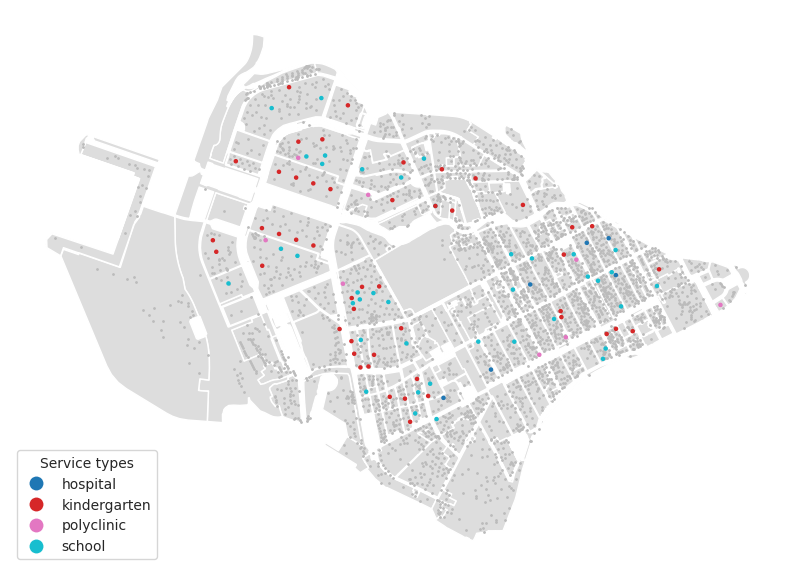

In [8]:
city_model.plot()

Save city model to file so we can use it later

In [9]:
city_model.to_pickle(os.path.join(example_data_path, 'city_model.pickle'))